In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
import nltk
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][20]

Total articles about Bitcoin: 4569


{'source': {'id': 'the-next-web', 'name': 'The Next Web'},
 'author': 'Satoshi Nakaboto',
 'title': 'Satoshi Nakaboto: ‘Bitcoin dips below $8K again, fuelling bears’',
 'description': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day. Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you what’s been going on with Bitcoin in the past 24 hours. As Baudriallard used to say: Time is money! B…',
 'url': 'https://thenextweb.com/hardfork/2019/10/17/satoshi-nakaboto-bitcoin-dips-below-8k-again-fuelling-bears/',
 'urlToImage': 'https://img-cdn.tnwcdn.com/image/hardfork?filter_last=1&fit=1280%2C640&url=https%3A%2F%2Fcdn0.tnwcdn.com%2Fwp-content%2Fblogs.dir%2F1%2Ffiles%2F2019%2F08%2Fbitcoin_today-header_bitcoin_today.jpg&signature=30221b6a68049cc6bc3b58f3ddb38864',
 'publishedAt': '2019-10-17T09:02:37Z',
 'content': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today,

In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][20]

Total articles about Ethereum: 927


{'source': {'id': None, 'name': 'Extremetech.com'},
 'author': 'Michael Justin Allen Sexton',
 'title': 'Save an Additional 20 Percent On This 10-Course Ethereum & Blockchain Training Bundle',
 'description': 'The Complete Blockchain & Ethereum Programmer Bundle will teach you everything you need to know for just $23.20—over 95 percent off. The post Save an Additional 20 Percent On This 10-Course Ethereum & Blockchain Training Bundle appeared first on ExtremeTech.',
 'url': 'https://www.extremetech.com/deals/300523-save-an-additional-20-percent-on-this-10-course-ethereum-blockchain-training-bundle',
 'urlToImage': 'https://www.extremetech.com/wp-content/uploads/2019/10/sale_21749_primary_image_wide.jpg',
 'publishedAt': '2019-10-18T13:00:53Z',
 'content': 'Despite Bitcoins volatility, many financial experts and economists agree that cryptocurrencies are here to stay, and the good news is that Bitcoin is just one of a growing number of cryptocurrencies that are currently bringing new we

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,positive,negative,neutral,text
0,-0.1531,0.000,0.039,0.961,Less than two miles from Icelands Reykjavik ai...
1,0.2263,0.040,0.000,0.960,At least that's the idea. While it's not as in...
2,-0.4767,0.000,0.069,0.931,Say it with me: Bitcoin is not anonymous. \r\n...
3,0.0258,0.061,0.080,0.859,Federal authorities in the U.S. have unsealed ...
4,0.0000,0.000,0.000,1.000,High school students in France may be among th...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,positive,negative,neutral,text
0,0.4404,0.059,0.0,0.941,TL;DR: The in-depth Complete Blockchain and Et...
1,0.6249,0.100,0.0,0.900,Disrupt Berlin is right around the corner. And...
2,0.2263,0.040,0.0,0.960,At least that's the idea. While it's not as in...
3,0.4601,0.085,0.0,0.915,"he plaBy now, you should almost certainly know..."
4,0.4019,0.068,0.0,0.932,TLDR: The Complete Blockchain and Ethereum Pro...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.081614,0.060112,0.050786,0.889143
std,0.459698,0.049789,0.058707,0.077009
min,-0.831600,0.000000,0.000000,0.640000
25%,-0.305675,0.005500,0.000000,0.842750
50%,0.083600,0.064500,0.040500,0.907000
75%,0.507000,0.082750,0.080000,0.934750
max,0.914100,0.249000,0.271000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.188444,0.056347,0.025221,0.918432
std,0.399743,0.054803,0.044742,0.065527
min,-0.877900,0.000000,0.000000,0.652000
25%,0.000000,0.000000,0.000000,0.879500
50%,0.226300,0.057000,0.000000,0.931000
75%,0.510300,0.099000,0.045500,0.958000
max,0.862500,0.239000,0.287000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin but by a mere .00003 so it is not significant and both are by all standards the same. 

Q: Which coin had the highest compound score?

A: Ethereum has a higher mean compound score. 

Q. Which coin had the highest positive score?

A: Bitcoin has the highest postive score. 

Q: Which coin had the highest negative score?

A: Bitcoin has the highest negative score. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary

In [13]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /Users/ryip/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [15]:
# Create a new tokens column for bitcoin
bitcoin_text = bitcoin_df['text'].tolist()
sentence_tokenized = [sent_tokenize(i) for i in bitcoin_text]
word_tokenized = []
for story in sentence_tokenized:
    words = []
    for sent in story:
        words = tokenizer(story)
    # append all words for each article to the word_tokenized list
    word_tokenized.append(words)
bitcoin_df['bitcoin_tokens'] = word_tokenized    

In [16]:
bitcoin_df

,compound,positive,negative,neutral,text,bitcoin_tokens
0,-0.1531,0.000,0.039,0.961,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport..."
1,0.2263,0.040,0.000,0.960,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
2,-0.4767,0.000,0.069,0.931,Say it with me: Bitcoin is not anonymous. \r\n...,"[say, bitcoin, anonymous, three, hundred, thir..."
3,0.0258,0.061,0.080,0.859,Federal authorities in the U.S. have unsealed ...,"[federal, authority, us, unsealed, charge, sou..."
4,0.0000,0.000,0.000,1.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
...,...,...,...,...,...,...
93,0.5106,0.097,0.032,0.871,Did you miss the overnight rise in Bitcoin pri...,"[miss, overnight, rise, bitcoin, price, octobe..."
94,0.5719,0.072,0.000,0.928,"Lately, headlines have been flooded with news ...","[lately, headline, flooded, news, dark, mode, ..."
95,0.3506,0.091,0.037,0.872,The US Department of Justice unraveled a dark ...,"[us, department, justice, unraveled, dark, web..."
96,0.4767,0.112,0.046,0.842,"One year ago exactly, I wrote my first piece a...","[one, year, ago, exactly, wrote, first, piece,..."


In [17]:
# Create a new tokens column for ethereum
ethereum_text = ethereum_df['text'].tolist()
sentence_tokenized = [sent_tokenize(i) for i in ethereum_text]
word_tokenized = []
for story in sentence_tokenized:
    words = []
    for sent in story:
        words = tokenizer(story)
    # append all words for each article to the word_tokenized list
    word_tokenized.append(words)
ethereum_df['ethereum_tokens'] = word_tokenized  

In [18]:
ethereum_df

,compound,positive,negative,neutral,text,ethereum_tokens
0,0.4404,0.059,0.000,0.941,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
1,0.6249,0.100,0.000,0.900,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
2,0.2263,0.040,0.000,0.960,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
3,0.4601,0.085,0.000,0.915,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
4,0.4019,0.068,0.000,0.932,TLDR: The Complete Blockchain and Ethereum Pro...,"[tldr, complete, blockchain, ethereum, program..."
...,...,...,...,...,...,...
90,0.5574,0.103,0.000,0.897,Distributed naming system Ethereum Name Servic...,"[distributed, naming, system, ethereum, name, ..."
91,-0.6369,0.000,0.120,0.880,Bitcoin Technical Analysis: BTC/USD The Big Ba...,"[bitcoin, technical, analysis, btcusd, big, ba..."
92,-0.5106,0.000,0.095,0.905,Team lead at the Ethereum (ETH) Foundation Pét...,"[team, lead, ethereum, eth, foundation, pter, ..."
93,0.1446,0.105,0.069,0.826,Bitcoin and cryptocurrency exchanges have been...,"[bitcoin, cryptocurrency, exchange, effectivel..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    count = dict(Counter(bigrams))
    return pd.DataFrame(list(count.items()), columns=['bigram', 'count']).sort_values(by=['count'], ascending=False)

In [21]:
bitcoin_bigrams = bigram_counter(bitcoin_df['text'])
bitcoin_bigrams

,bigram,count
157,"(satoshi, nakaboto)",38
180,"(bitcoin, btc)",25
168,"(nakaboto, tell)",19
163,"(daywelcome, another)",19
171,"(going, bitcoin)",19
...,...,...
743,"(dont, know)",1
742,"(november, dont)",1
741,"(morning, november)",1
740,"(moonday, morning)",1


In [22]:
# Generate the Ethereum N-grams where N=2
ethereum_bigrams = bigram_counter(ethereum_df['text'])
ethereum_bigrams

,bigram,count
925,"(early, morning)",11
909,"(char, ethereumethereum)",11
916,"(ethereum, ended)",11
938,"(ended, day)",10
926,"(morning, intraday)",10
...,...,...
644,"(throughout, yeardespite)",1
643,"(headline, throughout)",1
642,"(made, headline)",1
641,"(continuously, made)",1


In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    tokens = tokenizer(big_string)
    return Counter(tokens).most_common(N)

In [24]:
# Get the top 10 words for Bitcoin
bitcoin_10 = token_count(bitcoin_df['text'])
bitcoin_10

[('bitcoin', 99),
 ('char', 97),
 ('satoshi', 41),
 ('nakaboto', 38),
 ('cryptocurrency', 30),
 ('btc', 27),
 ('ha', 26),
 ('say', 22),
 ('past', 22),
 ('today', 21)]

In [25]:
# Get the top 10 words for Ethereum
ethereum_10 = token_count(ethereum_df['text'])
ethereum_10

[('char', 95),
 ('ethereum', 67),
 ('blockchain', 31),
 ('ha', 30),
 ('bitcoin', 29),
 ('day', 27),
 ('cryptocurrency', 19),
 ('morning', 16),
 ('price', 15),
 ('week', 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [45]:
bitcoin_df['bitcoin_tokens']

0     [less, two, mile, icelands, reykjavik, airport...
1     [least, thats, idea, intensive, mining, bitcoi...
2     [say, bitcoin, anonymous, three, hundred, thir...
3     [federal, authority, us, unsealed, charge, sou...
4     [high, school, student, france, may, among, fi...
                            ...                        
93    [miss, overnight, rise, bitcoin, price, octobe...
94    [lately, headline, flooded, news, dark, mode, ...
95    [us, department, justice, unraveled, dark, web...
96    [one, year, ago, exactly, wrote, first, piece,...
97    [latest, podcast, mp, read, short, story, mate...
Name: bitcoin_tokens, Length: 98, dtype: object

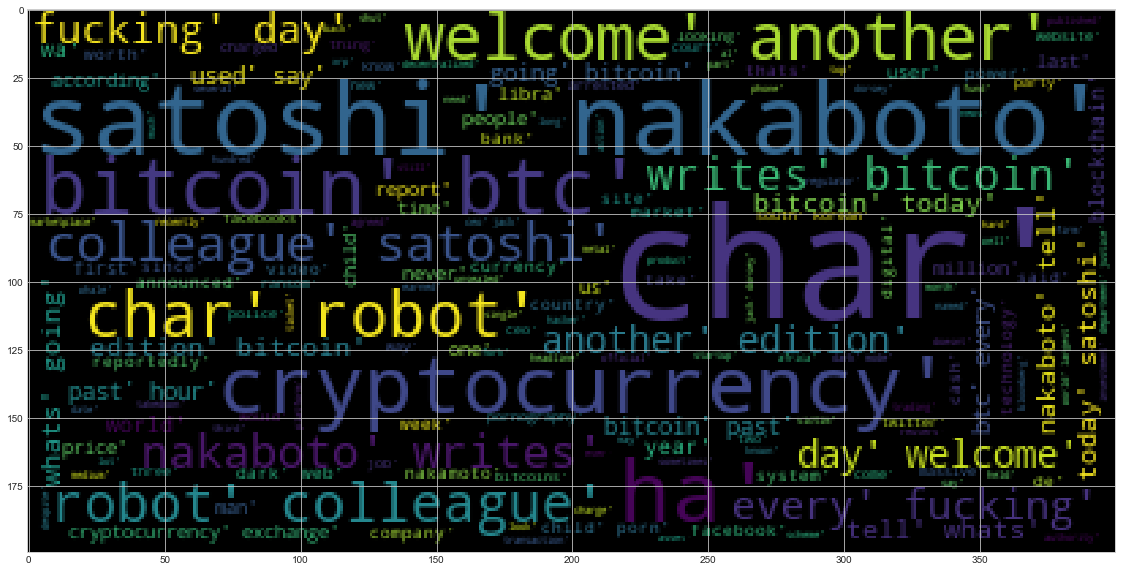

In [47]:
# Generate the Bitcoin word cloud
bt_entities = bitcoin_df['bitcoin_tokens'].astype(str)
wc = WordCloud().generate(' '.join(bt_entities))
plt.imshow(wc)

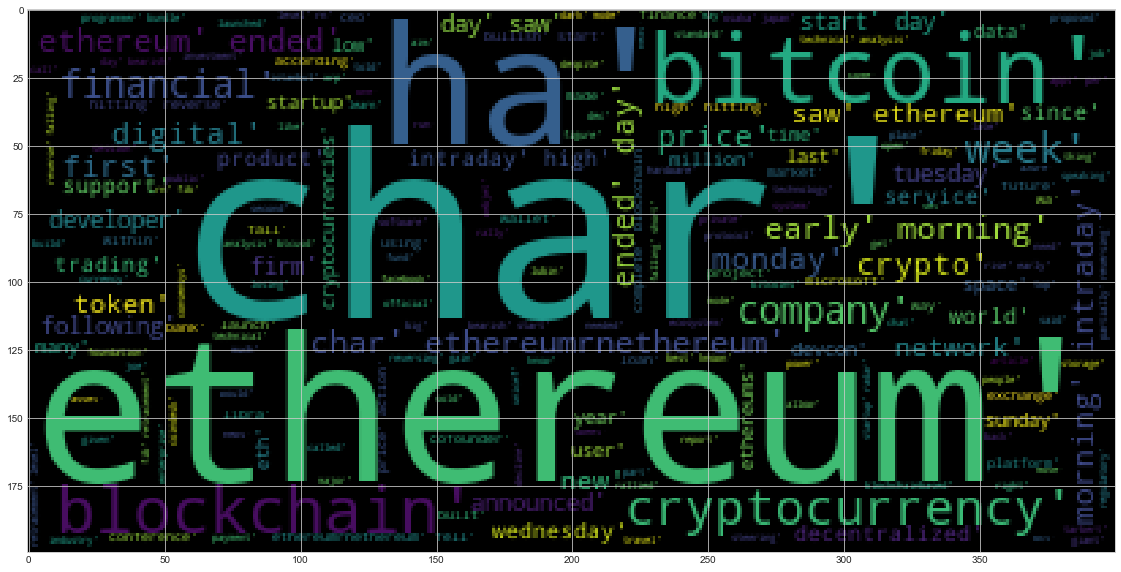

In [49]:
# Generate the Ethereum word cloud
et_entities = ethereum_df['ethereum_tokens'].astype(str)
wc = WordCloud().generate(' '.join(et_entities))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [50]:
import spacy
from spacy import displacy

In [51]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [52]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [74]:
# Concatenate all of the bitcoin text together
bitcoin_all_text = bitcoin_df['text'].str.cat(sep=', ')
bitcoin_all_text[:3000]

"Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars], At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars], Say it with me: Bitcoin is not anonymous.\xa0\r\nThree hundred and thirty-seven alleged members of a massive dark web child pornography website were reminded of that fact last year when they were arrested by a global coalition of law enforcement. According to a De… [+2993 chars], Federal authorities in the U.S. have unsealed charges against the South Korean operator of a child porn ring thats been billed as the worlds largest dark web child po

In [96]:
# Run the NER processor on all of the text
bt_doc = nlp(bitcoin_all_text)
# Add a title to the document
bt_doc.user_data["title"] = "Bitcoin NER"

In [97]:
# Render the visualization
displacy.render(bt_doc, style='ent')

In [144]:
# List all Entities
bt_entities = [(ent.text, ent.label_) for ent in bt_doc.ents]

for x in bt_entities:
    print(x[0], x[1])

Less than two miles QUANTITY
Reykjavik airport FAC
tens of thousands CARDINAL
Bitcoin PERSON
HTC ORG
Bitcoin PERSON
Three hundred and thirty-seven CARDINAL
last year DATE
U.S. GPE
South Korean NORP
Welcome FAC
Video NORP
Bitcoin PERSON
France GPE
first ORDINAL
The Next Web WORK_OF_ART
French NORP
Le Ministère de lÉducation Nationale ORG
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Baudriallard PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin BTC PERSON
Bitcoin PERSON
Today DATE
Satoshi Nakaboto PERSON
Bitcoin PERSON
the past 24 hours TIM

---

## Ethereum NER

In [101]:
# Concatenate all of the bitcoin text together
ethereum_all_text =  ethereum_df['text'].str.cat(sep=', ')
ethereum_all_text[:3000]

'TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it\'s a worthy investment, and it when it comes to top… [+1491 chars], Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars], At least that\'s the idea. While it\'s not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars], he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here it is.\r\

In [102]:
# Run the NER processor on all of the text
et_doc = nlp(ethereum_all_text)
# Add a title to the document
et_doc.user_data["title"] = "Ethereum NER"

In [126]:
# Render the visualization
displacy.render(et_doc, style='ent')

In [145]:
# List all Entities
et_entities = [(ent.text, ent.label_) for ent in et_doc.ents]

for x in et_entities:
    print(x[0], x[1])

Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
Bitcoin PERSON
Disrupt Berlin PERSON
December 11 and December 12 DATE
Bitcoin PERSON
HTC ORG
second ORDINAL
The Complete Blockchain and Ethereum Programming Bundle EVENT
30 MONEY
Everybodys ORG
Ethereum Foundation's ORG
Devcon 5 FAC
Osaka GPE
Japan GPE
OpenLibra ORG
Facebook ORG
OpenLibra ORG
Libra ORG
Blockchain PERSON
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto PERSON
Bitcoin PERSON
Blockchai GPE
Reuters ORG
Bitcoin PERSON
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg GPE
Swiss NORP
countrys NORP
Swiss NORP
Block ORG
Opera ORG
one CARDINAL
Opera Mobile ORG
XRP ORG
Bitcoin PERSON
XRP ORG
third ORDINAL
the day DATE
six CARDINAL
Bitcoin PERSON
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
first ORDINAL
last week DATE
Chinese NORP
2021 DATE
first ORDINAL
last year DATE
Chinese NORP
Tencent GPE
countrys NORP
British Columbia GPE
Ca